# Taylor factor calculation using Bishop Hill method

Here, we are given with a strain matrix. For this particular strain matrix, we will be applying the Bishop hill method to find the 28 states of stress in which, more than 5 slip systems get activated causing plastic deformation.

We shall also use the max work theorem which will help us calculate the required Taylor factor M.

In [1]:
import numpy as np
import pandas as pd

In [2]:
vals=[1,0,0,0,-0.5,0,0,0,-0.5]

In [3]:
s=np.array(vals).reshape(3,3)

Let us check the shape of the given strain matrix and the values in it.

In [4]:
s.shape

(3, 3)

In [5]:
s

array([[ 1. ,  0. ,  0. ],
       [ 0. , -0.5,  0. ],
       [ 0. ,  0. , -0.5]])

1.4142135623730951

The above matrix shows the strain matrix given to us.

We are given the rolling direction along [1 1 0] direction and the normal direction along [0 0 1] direction. We can find the required transverse direction through a simple cross product. Hence, we can also find the orientation matrix G. Upon doing the cross product, we get the following orientation matrix.

In [6]:
temp=[1/1.414,-1/1.414,0,1/1.414,1/1.414,0,0,0,1]
g=np.array(temp).reshape(3,3)

In [7]:
g

array([[ 0.70721358, -0.70721358,  0.        ],
       [ 0.70721358,  0.70721358,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

Once the g matrix is calculated, we can safely convert the strain matrix s in sample coordinate system to crystal coordinate system as show below.

In [8]:
gs=np.dot(g,s)
gs

array([[ 0.70721358,  0.35360679,  0.        ],
       [ 0.70721358, -0.35360679,  0.        ],
       [ 0.        ,  0.        , -0.5       ]])

In [9]:
e=np.dot(gs,g.T)
e

array([[ 0.25007552,  0.75022657,  0.        ],
       [ 0.75022657,  0.25007552,  0.        ],
       [ 0.        ,  0.        , -0.5       ]])

The above matrix is the required strain matrix converted from sample coordinate to the crystal coordinate system.

## Von Mises strain calculation

In the next section, we are intersted to calculate the Von Mises strain. The formula for VM strain maybe calculated through the formula below:

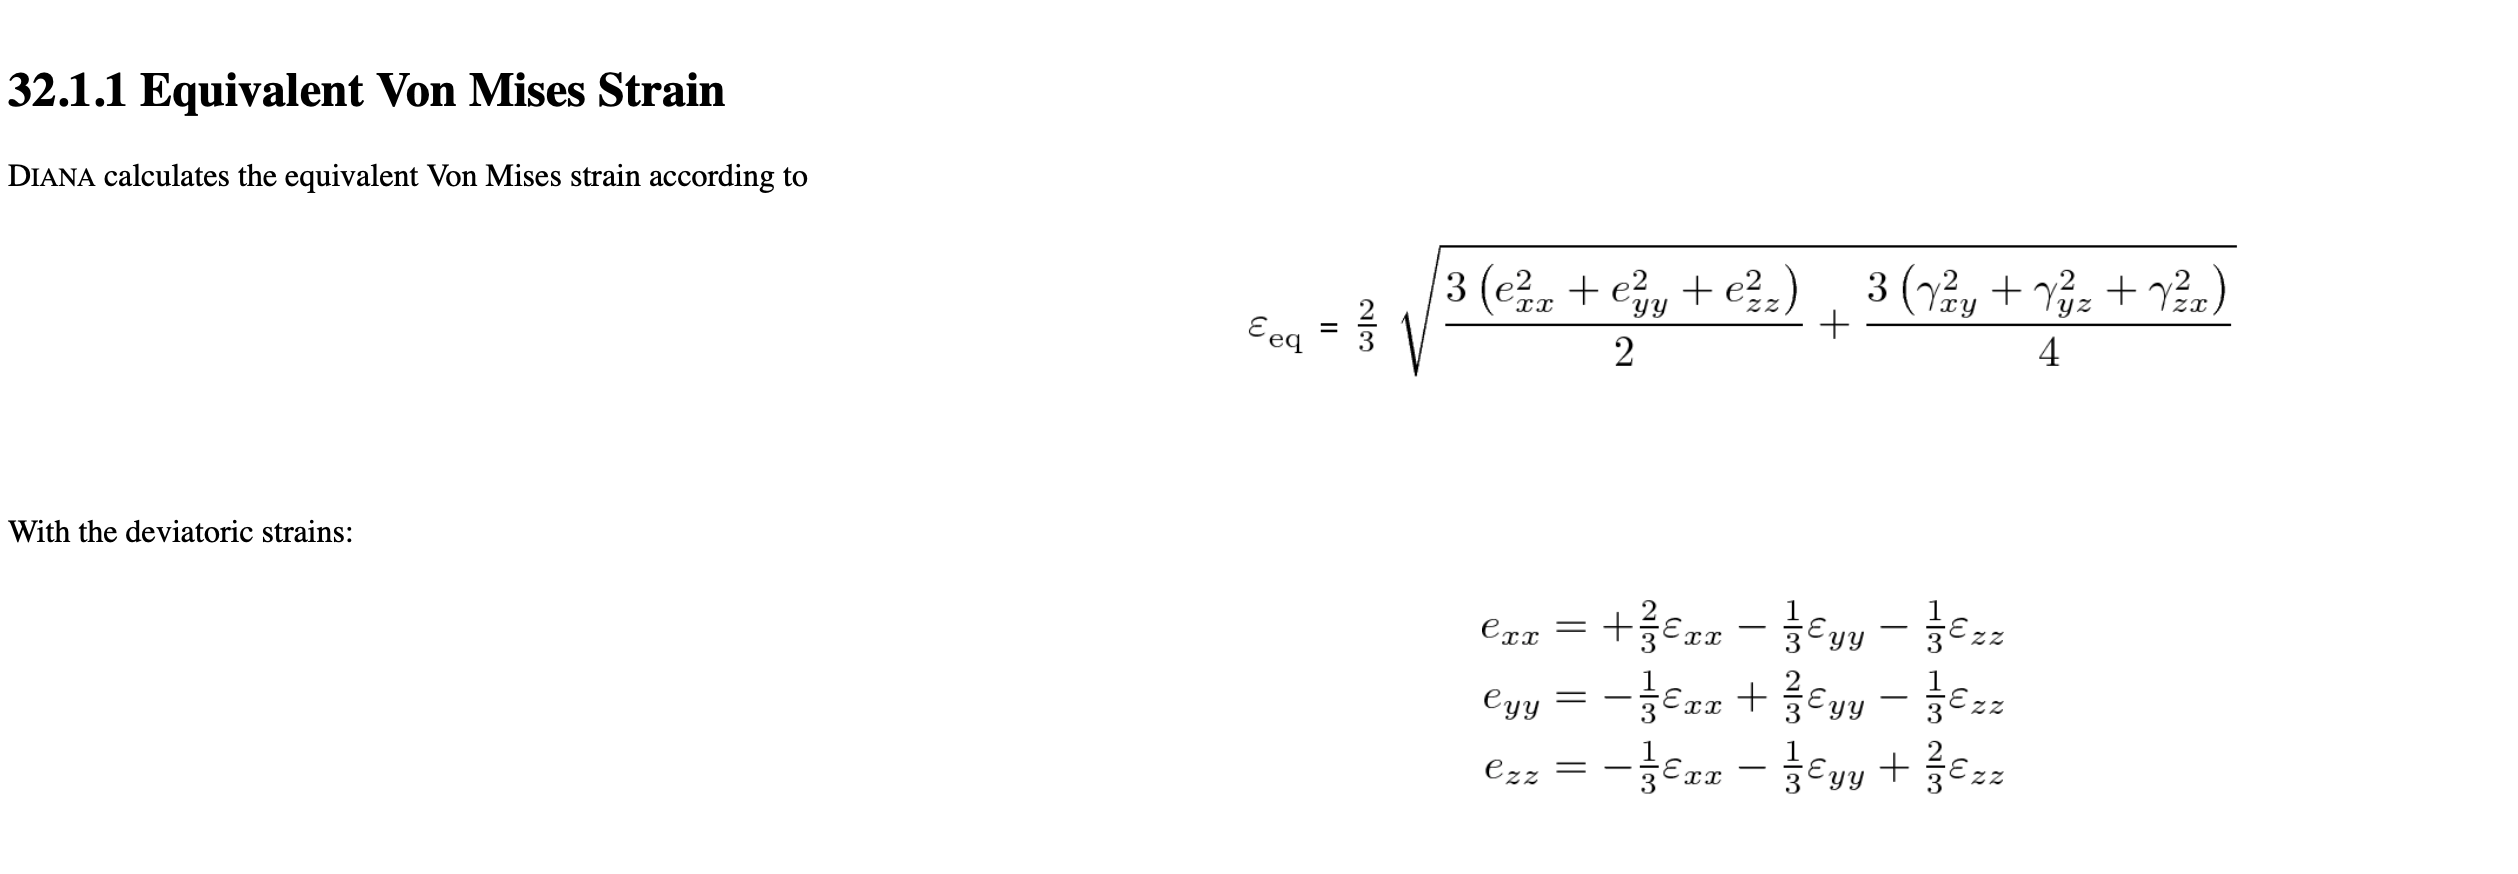


Let us calculate the Von Mises strain from the formula shown above. For simplicity, the left and right terms in the VM strain equation have been separately calculated as **term a and term b**.

In [10]:
term_a=((e[0][0])**2 + (e[1][1])**2 + (e[2][2])**2)*1.5
term_a

0.5626133013229155

In [11]:
term_b=(3/4)*((e[0][1])**2 + (e[1][2]**2) + (e[2][0])**2)
term_b

0.42212992797655996

In [12]:
term_c=(term_a+term_b)**0.5
term_c

0.992342294422381

In [13]:
vms=(2/3)*term_c
vms

0.6615615296149207

Above is the value of equivalent Von Mises Strain calculated which will be required for Taylor Factor calculation (M)

Now, in accordance with the 28 Bishop Hill stress states as shown below, we will calculate the yielding in terms of stress terms shown below.

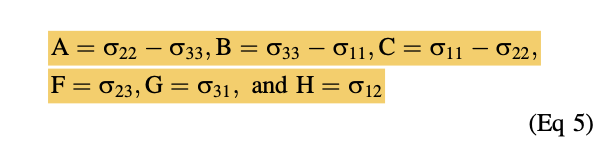

The list of 28 stress states for each of the stress terms are shown below

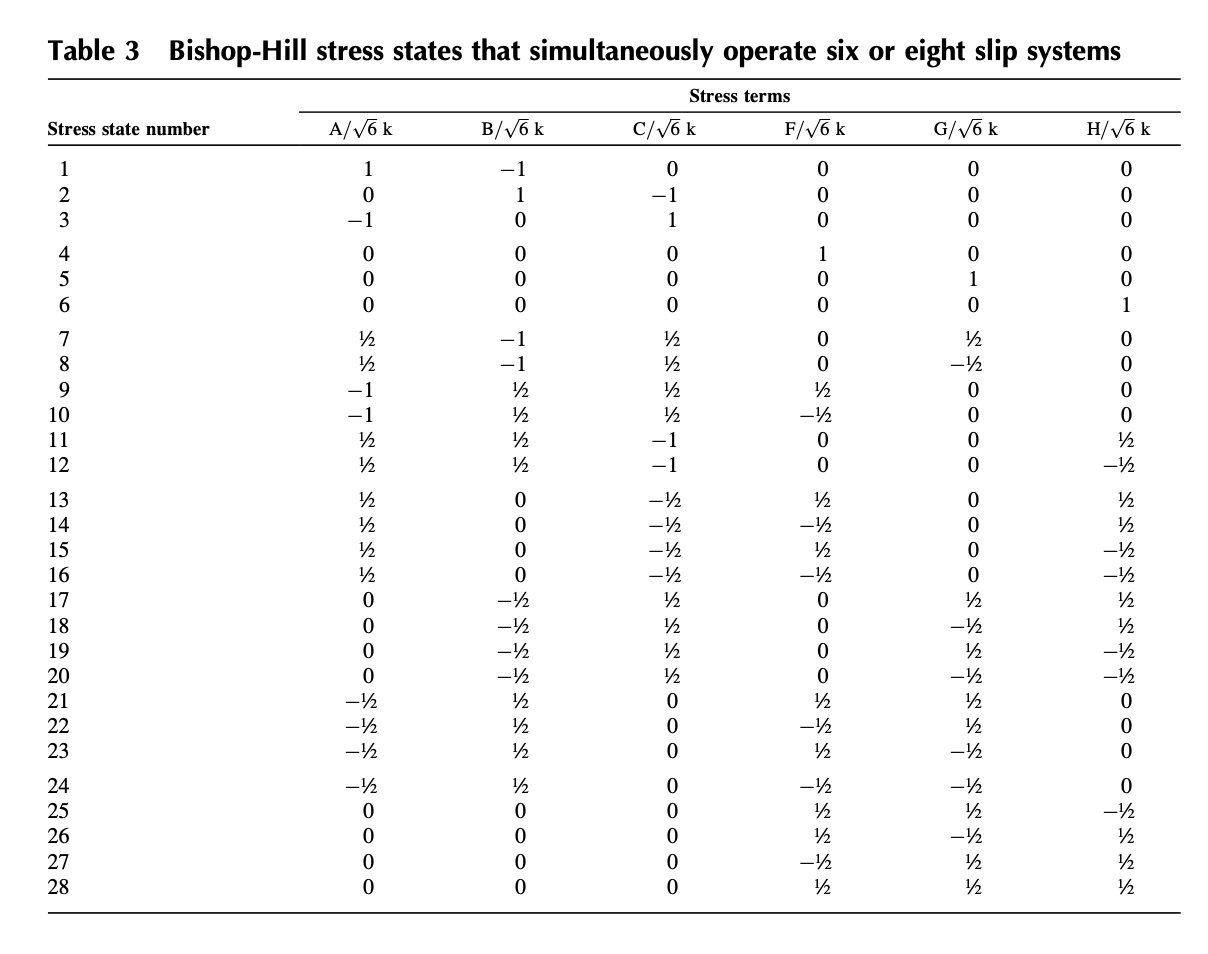

Where, K is the CRSS value. For the purpose of work calculation, K value gets cancelled in the numerator and denominator. Hence, we neglect the value of **K=1** for our calculations.

In [14]:
col_a=[1,0,-1,0,0,0,0.5,0.5,-1,-1,0.5,0.5,0.5,0.5,0.5,0.5,0,0,0,0,-0.5,-0.5,-0.5,-0.5,0,0,0,0]
col_b=[-1,1,0,0,0,0,-1,-1,0.5,0.5,0.5,0.5,0,0,0,0,-0.5,-0.5,-0.5,-0.5,0.5,.5,.5,.5,0,0,0,0]
col_c=[0,-1,1,0,0,0,.5,.5,.5,.5,-1,-1,-.5,-.5,-.5,-.5,.5,.5,.5,.5,0,0,0,0,0,0,0,0]
col_f=[0,0,0,1,0,0,0,0,.5,-.5,0,0,.5,-.5,.5,-.5,0,0,0,0,.5,-.5,.5,-.5,.5,.5,-.5,.5]
col_g=[0,0,0,0,1,0,.5,-.5,0,0,0,0,0,0,0,0,.5,-.5,.5,-.5,.5,.5,-.5,-.5,.5,-.5,.5,.5]
col_h=[0,0,0,0,0,1,0,0,0,0,.5,-.5,.5,.5,-.5,-.5,.5,.5,-.5,-.5,0,0,0,0,-.5,.5,.5,.5]

In [15]:
A=np.array(col_a)* 6**.5
B=np.array(col_b)* 6**.5
C=np.array(col_c)* 6**.5
F=np.array(col_f)* 6**.5
G=np.array(col_g)* 6**.5
H=np.array(col_h)* 6**.5

As all the stresses have been successfully calculated in the matrices form, we shall now calculate the work done using the formula below. Due to the nature of the matrices, we should get 28 different values of work done. Out of these, we shall choose the max work done for Taylor factor calculation.

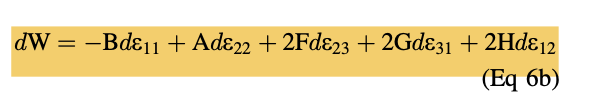

In [16]:
dW= (-B*e[0][0] + A*e[1][1] + 2*F*e[1][2] + 2*G*e[2][0] + 2*H*e[0][1] )

Let us now check the 28 various values of work done for the 28 independent stress states in a dataframe.

In [17]:
df=pd.DataFrame(columns=['Stress state','Work done'])

In [18]:
states=np.arange(1,29)
df['Stress state']=states
df.index=df['Stress state']
df['Work done']=dW
df.drop('Stress state',axis=1,inplace=True)

In [19]:
df

,Work done
Stress state,
1,1.225115
2,-0.612557
3,-0.612557
4,0.000000
5,0.000000
6,3.675345
7,0.918836
8,0.918836
9,-0.918836


Upon checking the various values of work done, we can see that the max work done is in stress state 1

In [20]:
max_work= max(abs(dW))
print('Maximum work done:{0:1f}'.format(max_work))

Maximum work done:3.675345


## Final Taylor factor calculation

In [21]:
taylor_factor= max_work/vms
print('The Taylor Factor for the above given strain matrix is: {0:1f}'.format(taylor_factor))

The Taylor Factor for the above given strain matrix is: 5.555560
